In [1]:
import pandas as pd
import numpy as np
import pathlib

# one of 2 datasets

In [2]:

behavior=pathlib.Path("shopping_behavior_updated.csv")
cons_habs=pd.read_csv(behavior)
mymap={'Yes':1,'No':0}
for col in ['Subscription Status', 'Discount Applied']:
    cons_habs[col]=cons_habs[col].map(mymap).astype('object')
def freq_factor(x):
    if x=='Every 3 Months': return 365/4
    if x=='Annually': return 365/1
    if x=='Quarterly': return 365/4
    if x=='Monthly': return 365/12
    if x=='Bi-Weekly': return 7/2
    if x=='Fortnightly': return 14
    if x=='Weekly': return 7
cons_habs['Total Days of Patronage']=(cons_habs['Frequency of Purchases'].map(freq_factor)*cons_habs['Previous Purchases']).astype(int)
cons_habs=cons_habs.drop(columns='Customer ID')
cons_habs.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Total Days of Patronage
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,Yes,14,Venmo,Fortnightly,196
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,Yes,2,Cash,Fortnightly,28
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,Yes,23,Credit Card,Weekly,161
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,Yes,49,PayPal,Weekly,343
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,Yes,31,PayPal,Annually,11315


In [3]:
cons_habs.dtypes

Age                          int64
Gender                      object
Item Purchased              object
Category                    object
Purchase Amount (USD)        int64
Location                    object
Size                        object
Color                       object
Season                      object
Review Rating              float64
Subscription Status         object
Shipping Type               object
Discount Applied            object
Promo Code Used             object
Previous Purchases           int64
Payment Method              object
Frequency of Purchases      object
Total Days of Patronage      int64
dtype: object

# import 2 of 2 datasets

In [4]:
coff_by_reg=pathlib.Path('../coffee/US_FL_IL_2020_to_2025_Weekly_googtrendcoffeesearch.csv')
coffee=pd.read_csv(coff_by_reg)
coffee=coffee[coffee.columns[1:]]
coffee.head()

,Florida,United States,Illinois
0,53,63,68
1,54,64,66
2,54,62,66
3,51,59,59
4,51,60,60


In [5]:
coffee.corr()

,Florida,United States,Illinois
Florida,1.000000,0.923026,0.917687
United States,0.923026,1.000000,0.920715
Illinois,0.917687,0.920715,1.000000


# import binning tools

In [6]:
from BinnerClass import Bin
bin=Bin()

# a look at coffee

In [7]:
coffee.dtypes

Florida          int64
United States    int64
Illinois         int64
dtype: object

In [8]:
for col in coffee.columns:
    print(f"{col}: has {coffee[col].nunique()} unique integers and {coffee[col].shape[0]} rows.")

Florida: has 41 unique integers and 262 rows.
United States: has 39 unique integers and 262 rows.
Illinois: has 41 unique integers and 262 rows.


# ========================================================================================================  
># THE FOLLOWING CELLS DEAL WITH FINDING MINIMUM NUMBER OF BINS THAT RETAIN STATISTICAL SIGNIFICANCE  

# Target n  variables against the rest

In [9]:
numeric_columns=None 
categoric_columns=None
categoric_target=None
numeric_target=['Illinois','Florida']  ###  TARGET THESE VARIABLES


bin.relational_binner(coffee,   # a pandas dataframe
                    numnum_meth_alpha_above=('pearson',0.9,True),    # Numeric to numeric instructions: a tuple with (test method, threshold, keep >= threshold): (str,float,bool)
                    catnum_meth_alpha_above=('kruskal',0.05,False),    # Categoric to numeric instructions: a tuple with (test method, threshold, keep >= threshold): (str,float,bool)
                    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     
                    categoric_columns=categoric_columns,    
                    numeric_target=numeric_target,      
                    categoric_target=categoric_target  )  
bin.numeric_target_column_minimums

{'Florida': 11, 'Illinois': 10}

# The entire dataset in one shot 

In [10]:
numeric_columns=None 
categoric_columns=None
categoric_target=None
numeric_target=None

bin.relational_binner(coffee,  
                    numnum_meth_alpha_above=('pearson',0.9,True),    
                    catnum_meth_alpha_above=None,   
                    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     
                    categoric_columns=categoric_columns,    
                    numeric_target=numeric_target,      
                    categoric_target=categoric_target  )
in_depth=bin.numeric_feature_col_thresholds
bin.numeric_target_column_minimums

{'Florida': 11, 'Illinois': 10, 'United States': 9}

# A close look at bin metrics for Illinois  
This explores binning strategies for all columns Illinois is related to based on the pearson correlation method used above.   
Near the end of this .ipynb are plots that cary this idea across all outputs

In [14]:
in_depth['Illinois']

{'Florida': {'min_within_threshold': 10,
  'max_beyond_threshold': 9,
  'threshold_stat': np.float64(0.9042673325800925)},
 'United States': {'min_within_threshold': 8,
  'max_beyond_threshold': 7,
  'threshold_stat': np.float64(0.9026325280521881)}}

# One-shot approach using spearman coefficient, pearson coefficient, and kendall's rank  

In [15]:
numeric_columns=None 
categoric_columns=None
categoric_target=None
numeric_target=None
bin.relational_binner(coffee,   numnum_meth_alpha_above=('pearson',0.9,True),   catnum_meth_alpha_above=('kruskal',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"pearson: {bin.numeric_target_column_minimums}")
bin.relational_binner(coffee,  numnum_meth_alpha_above=('spearman',0.9,True),    catnum_meth_alpha_above=('kruskal',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,  numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"spearman: {bin.numeric_target_column_minimums}")
bin.relational_binner(coffee,  numnum_meth_alpha_above=('kendall',0.7,True),   catnum_meth_alpha_above=('kruskal',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,   categoric_columns=categoric_columns,     numeric_target=numeric_target,     categoric_target=categoric_target  )
print(f"kendall: {bin.numeric_target_column_minimums}")

pearson: {'Florida': 11, 'Illinois': 10, 'United States': 9}
spearman: {'Florida': 24, 'Illinois': 34, 'United States': 28}
kendall: {'Florida': 6, 'Illinois': 5, 'United States': 4}


# One-shot approach using student's t-test, welch's t-test  
### Once with bins above p-value, and once below p-value  

In [16]:
bin.relational_binner(coffee,numnum_meth_alpha_above=('welch',0.05,False),   catnum_meth_alpha_above=None,    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"welch reject null: {bin.numeric_target_column_minimums}")
#print(bin.numeric_feature_col_thresholds)
bin.relational_binner(coffee,numnum_meth_alpha_above=('welch',0.05,True),   catnum_meth_alpha_above=None,    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"welch fail to reject null: {bin.numeric_target_column_minimums}")
#print(bin.numeric_feature_col_thresholds)
bin.relational_binner(coffee,numnum_meth_alpha_above=('student',0.05,False),   catnum_meth_alpha_above=None,    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"student reject null: {bin.numeric_target_column_minimums}")
bin.relational_binner(coffee,numnum_meth_alpha_above=('student',0.05,True),   catnum_meth_alpha_above=None,    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"student fail to reject null: {bin.numeric_target_column_minimums}")

welch reject null: {'Florida': 1, 'Illinois': 1, 'United States': 1}
welch fail to reject null: {'Illinois': 3, 'United States': 5}
student reject null: {'Florida': 1, 'Illinois': 1, 'United States': 1}
student fail to reject null: {'Illinois': 3, 'United States': 5}


# A look at consumer habits dataset

# Binning numeric columns based on a targeted categorical column: "Gender"

In [17]:
numeric_columns=None
categoric_columns=None
categoric_target='Gender'
numeric_target=None 
bin.relational_binner(cons_habs,numnum_meth_alpha_above=None,   catnum_meth_alpha_above=('kruskal',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis reject null: {bin.numeric_target_column_minimums}")
#print(bin.numeric_feature_col_thresholds)
bin.relational_binner(cons_habs,numnum_meth_alpha_above=None,   catnum_meth_alpha_above=('kruskal',0.05,True),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis null: {bin.numeric_target_column_minimums}")
#print(bin.numeric_feature_col_thresholds)
bin.relational_binner(cons_habs,numnum_meth_alpha_above=None,   catnum_meth_alpha_above=('anova',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"ANOVA reject null: {bin.numeric_target_column_minimums}")
bin.relational_binner(cons_habs,numnum_meth_alpha_above=None,   catnum_meth_alpha_above=('anova',0.05,True),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"ANOVA null: {bin.numeric_target_column_minimums}")

kruskal_wallis reject null: {'Previous Purchases': 3}
kruskal_wallis null: {'Review Rating': 1, 'Age': 1, 'Purchase Amount (USD)': 1, 'Total Days of Patronage': 1}
ANOVA reject null: {'Previous Purchases': None}
ANOVA null: {'Review Rating': None, 'Age': None, 'Purchase Amount (USD)': None, 'Total Days of Patronage': None}


# Same categorical target, "Gender", but add a numeric target, "Review Rating".    
The function will look at all numeric columns statisticaly within the threshold with "Gender", and it will look at "Review Rating" for all the columns it is within the threshold with

In [18]:
numeric_columns=None
categoric_columns=None
categoric_target='Gender'
numeric_target='Review Rating' 
bin.relational_binner(cons_habs,numnum_meth_alpha_above=('welch',0.05,False),   catnum_meth_alpha_above=('kruskal',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis reject null & welch's T-test reject null: {bin.numeric_target_column_minimums}")
bin.relational_binner(cons_habs,numnum_meth_alpha_above=('welch',0.05,True),   catnum_meth_alpha_above=('kruskal',0.05,True),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis null & welch's T-test null: {bin.numeric_target_column_minimums}")

kruskal_wallis reject null & welch's T-test reject null: {'Review Rating': 16, 'Previous Purchases': 3}
kruskal_wallis null & welch's T-test null: {'Review Rating': 1, 'Age': 1, 'Purchase Amount (USD)': 1, 'Total Days of Patronage': 1}


# Manual categorical and numeric input

In [19]:
numeric_columns=['Total Days of Patronage', 'Review Rating', 'Previous Purchases','Age']  
categoric_columns=['Shipping Type','Gender', 'Item Purchased', 'Category']
categoric_target=None 
numeric_target=None
bin.relational_binner(cons_habs,numnum_meth_alpha_above=('welch',0.05,False),   catnum_meth_alpha_above=('kruskal',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis reject null & welch's T-test reject null: {bin.numeric_target_column_minimums}")
bin.relational_binner(cons_habs,numnum_meth_alpha_above=('welch',0.05,True),   catnum_meth_alpha_above=('kruskal',0.05,True),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis null & welch's T-test null: {bin.numeric_target_column_minimums}")

kruskal_wallis reject null & welch's T-test reject null: {'Review Rating': 7, 'Age': 1, 'Previous Purchases': 16, 'Total Days of Patronage': 1}
kruskal_wallis null & welch's T-test null: {'Review Rating': 1, 'Age': 1, 'Total Days of Patronage': 1, 'Previous Purchases': 1}


# One-shot approach with no targets

In [20]:
numeric_columns=None
categoric_columns=None
categoric_target=None
numeric_target=None
bin.relational_binner(cons_habs,numnum_meth_alpha_above=('welch',0.05,False),   catnum_meth_alpha_above=('kruskal',0.05,False),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis reject null & welch's T-test reject null: {bin.numeric_target_column_minimums}")
reject_breakdown_metrics=bin.numeric_feature_col_thresholds
bin.relational_binner(cons_habs,numnum_meth_alpha_above=('welch',0.05,True),   catnum_meth_alpha_above=('kruskal',0.05,True),    original_value_count_threashold=5,  
                    numeric_columns=numeric_columns,     categoric_columns=categoric_columns,    numeric_target=numeric_target,      categoric_target=categoric_target  )
print(f"kruskal_wallis null & welch's T-test null: {bin.numeric_target_column_minimums}")
null_breakdown_metrics=bin.numeric_feature_col_thresholds

kruskal_wallis reject null & welch's T-test reject null: {'Review Rating': 16, 'Purchase Amount (USD)': 4, 'Age': 1, 'Previous Purchases': 16, 'Total Days of Patronage': 2}
kruskal_wallis null & welch's T-test null: {'Review Rating': 1, 'Purchase Amount (USD)': 1, 'Age': 1, 'Previous Purchases': 21, 'Total Days of Patronage': 1}


# A look at the column-to-column breakdown of fail-to-reject and of reject bin thresholds

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
def plot_min_within_threshold(binning_metrics):
    for outer_key, inner_dict in binning_metrics.items():
        df = pd.DataFrame.from_dict(
            {
                k: v['min_within_threshold']
                for k, v in inner_dict.items()
            },
            orient="index",
            columns=["min_within_threshold"]
        ).reset_index().rename(columns={"index": "feature"})
        df = df.sort_values("min_within_threshold", ascending=False).reset_index(drop=True)

        plt.style.use('seaborn-v0_8-darkgrid')
        plt.figure(figsize=(20,4))
        sns.barplot(
            data=df,
            x="feature",
            y="min_within_threshold"
        )
        fontsize=15
        plt.title(f"\n{outer_key}\n",fontsize=fontsize+5)
        plt.xlabel("Feature",fontsize=fontsize-5)
        plt.ylabel("Min Bins Within Threshold",fontsize=fontsize-5)
        plt.xticks(rotation=20, ha="right",fontsize=fontsize)
        plt.tight_layout()
        #plt.grid()
        plt.show()


# Bins that maintain rejected null thresholds  

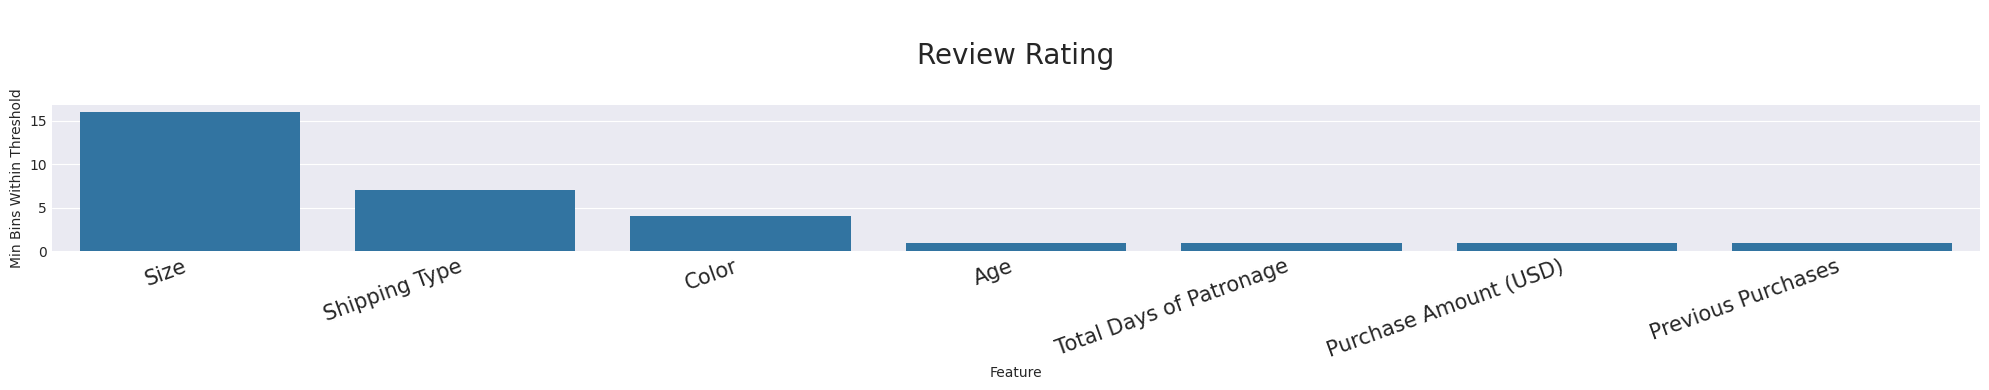

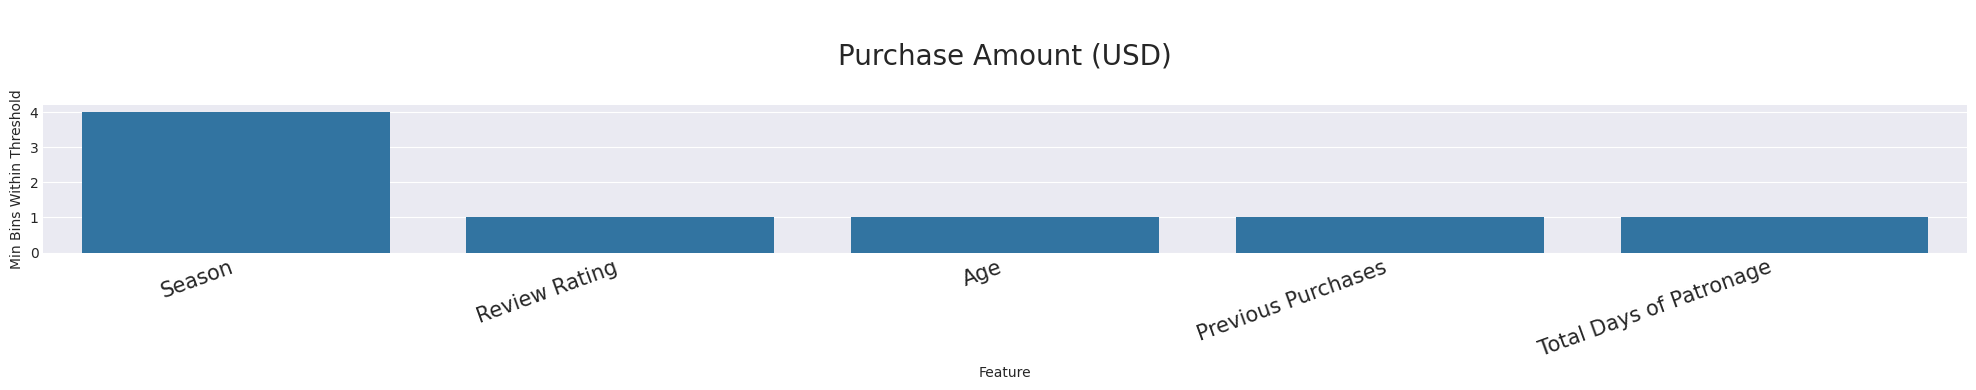

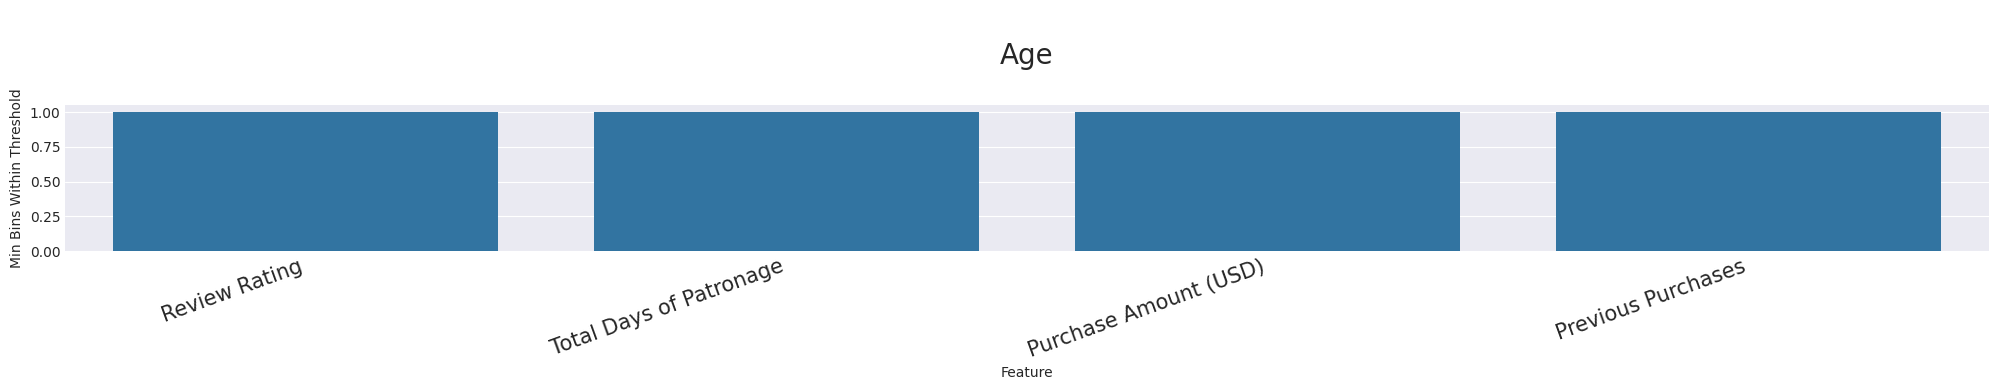

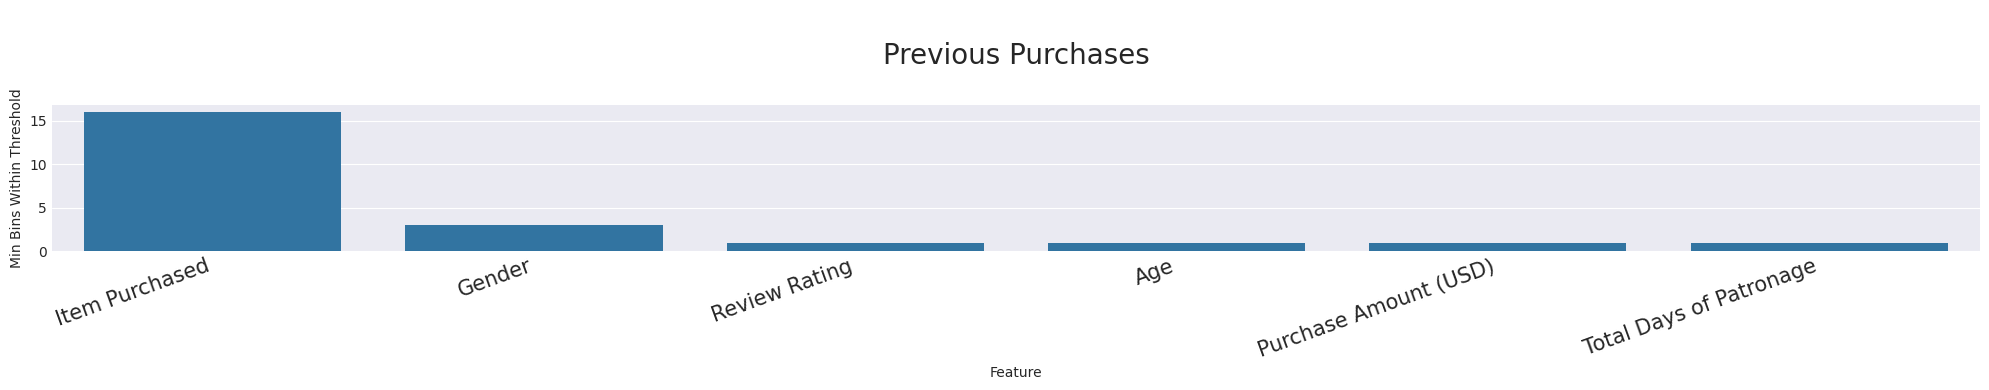

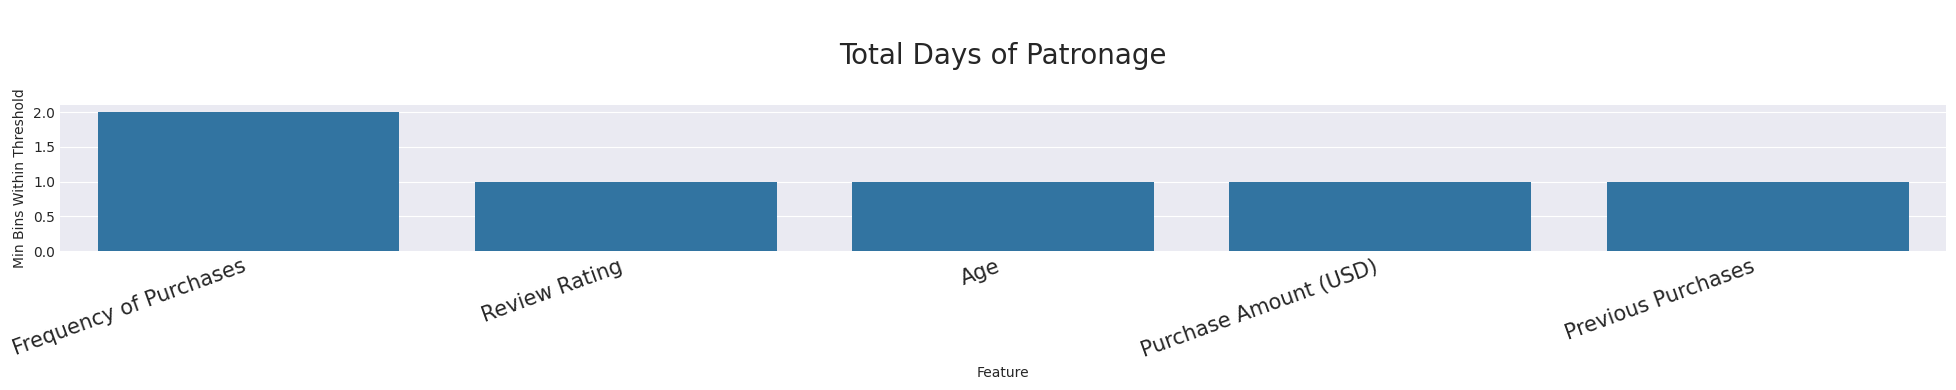

In [22]:
plot_min_within_threshold(reject_breakdown_metrics)

# Bins that maintain fail to reject null thresholds

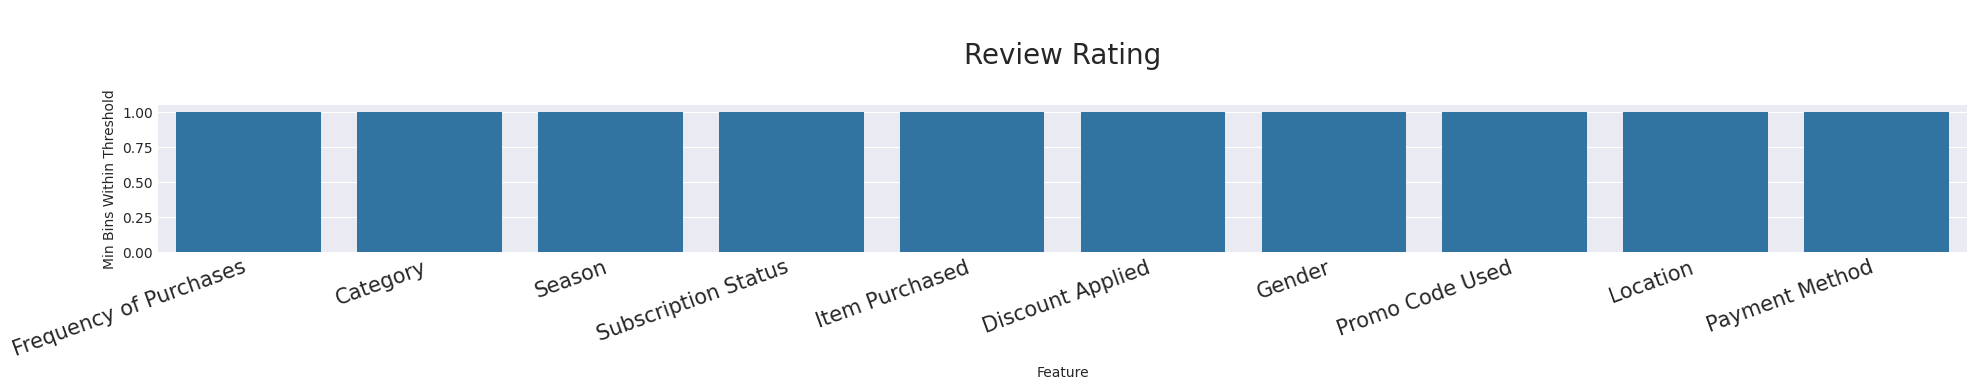

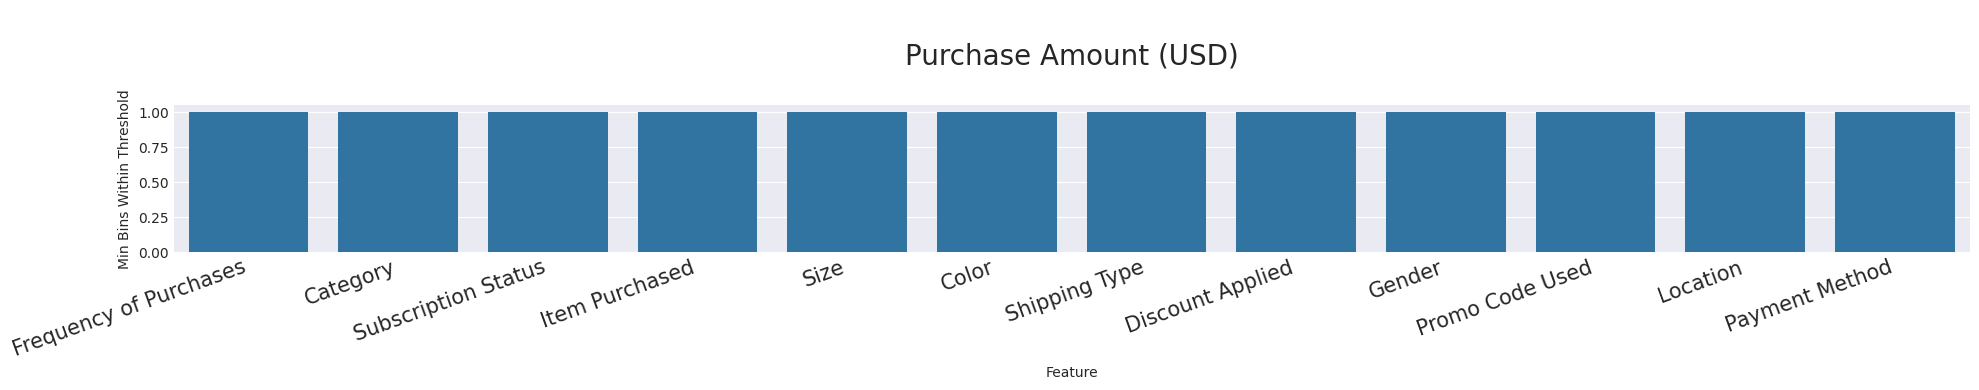

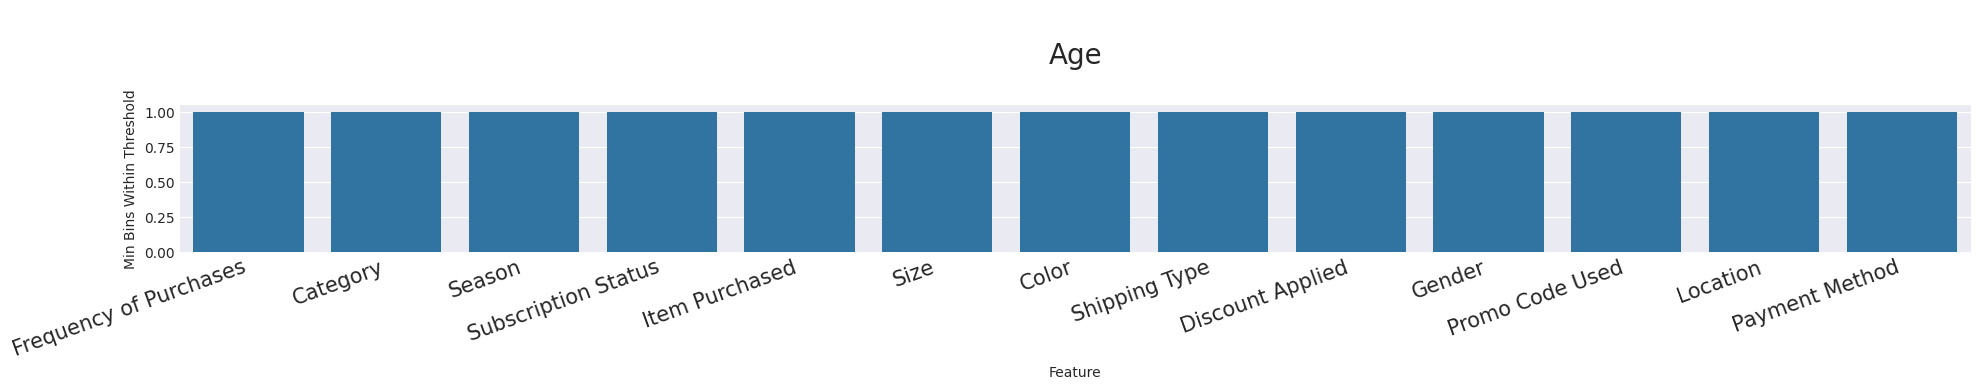

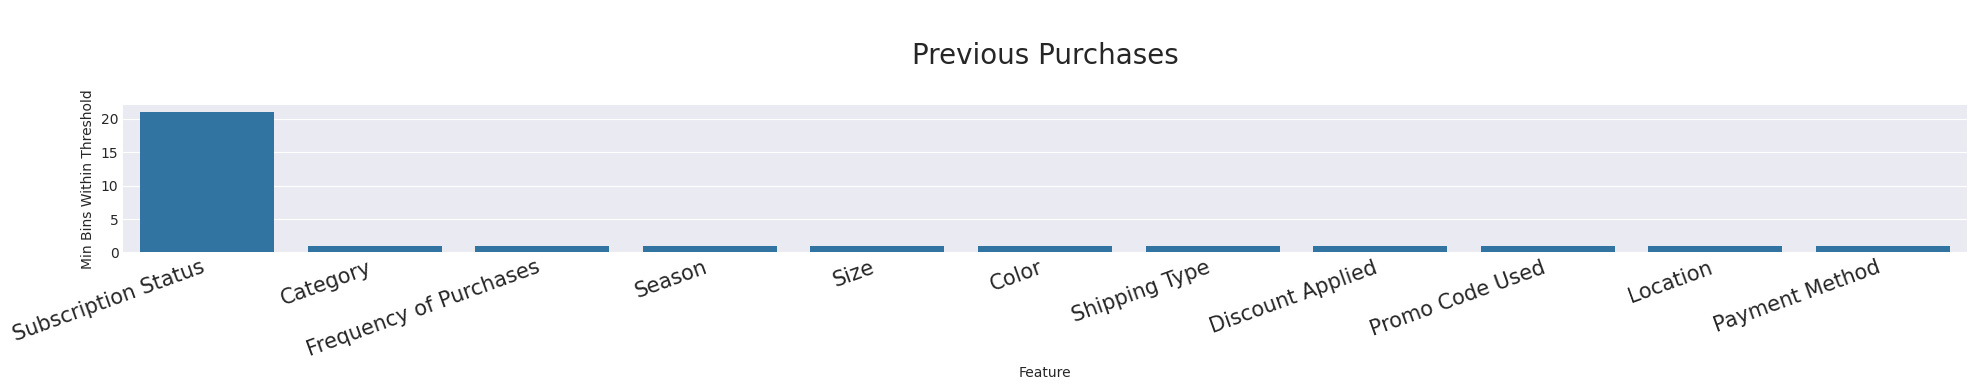

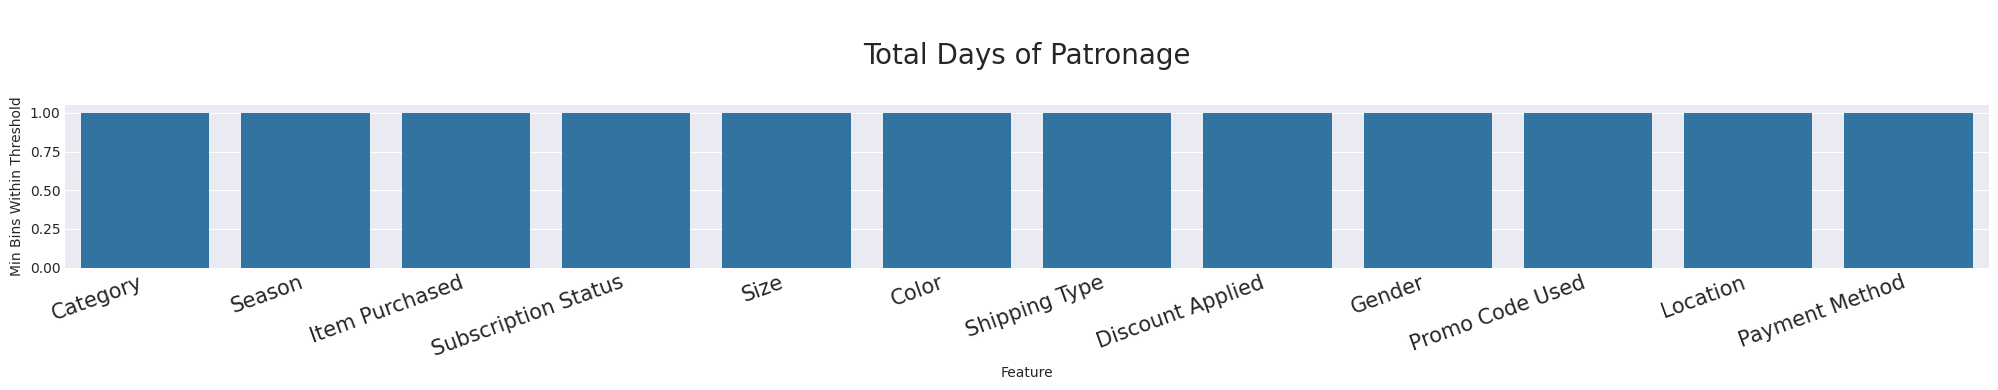

In [23]:
plot_min_within_threshold(null_breakdown_metrics)